<a href="https://colab.research.google.com/github/PedroFlorencioNeto/distribuicao-de-energia/blob/main/389276_TrabalhoDistribuicaoEnergia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://drive.google.com/uc?export=view&id=1D4Q-wjSrnO7C6gOF-jnflQJR7Ch21o_F)

---
<h3><center> <b>Trabalho 01: Análise de Dados em Sistemas de Distribuição</b> 

Distribuição de Energia Elétrica - TH0197 </center></h3>

Este notebook apresenta os resultados da análise dos cinco ramais de baixa tensão propostos como objeto de estudo na disciplina Distribuição de Energia Elétrica do Departamento de Engenharia Elétrica da Universidade Federal do Ceará.

Pedro Florencio de Almeida Neto - 389276

<i>pedroflorencio@alu.ufc.br</i>

Fortaleza, 25 de abril de 2023

---

#### **1. Introdução**


#### **2. Objetivos**

Com base nos dados obtidos na rede simbench `'1-MVLV-urban-all-2-sw'`, e para o período do mês de abril, escolha cinco ramais de baixa tensão aleatórios e determine para cada um deles os seguintes parâmetros:
- Fator de demanda;
- Fator de carga;
- Curva de demanda diversificada (faça também para o sistema completo);
- Curva de duração de carga (faça também para o sistema completo);
- Demanda média;
- Demanda máxima diversificada;
- Demandas máximas não-coincidentes (dos consumidores por ramal);
- Realize o levantamento da curva de fator de diversidade;
- Realize o levantamento de uma curva de tendência kWh (Energia) vs. kW(Demanda máxima) para estimação de valores de demanda máxima (verifique a ocorrência de outliers nos dados);
- Utilizando a curva de tendência encontrada selecione mais um ramal aleatoriamente (diferente dos já selecionados) utilize a curva de tendência e a tabela de fatores de diversidade para estimar a demanda diversificada máxima. Verifique qual a mais aderente e verificando os erros obtidos nessa metodologia;
- Execute fluxo de carga e verifique os carregamentos máximos das linhas e os níveis de tensão máximos e mínimos, assim como seus horários de ocorrência. Esta rede está sobredimensionada ou subdimensionada?

**Bônus**
- No caso de defeito no trecho xx, qual a melhor estratégia de recomposição? Justifique sua análise com resultados de fluxo de carga.

#### **3. Fundamentação Teórica**

**3.1. Sistema de Distribuição**

O sistema de distribuição é o trecho do sistema elétrico de potência que transfere eletricidade do sistema de transmissão e entrega aos consumidores (Figura 01). Pode ser descrito como todo sistema que é radial ou com nível de tensão abaixo de 35kV. Um sistema de distribuição típico é composto por:
* Subestações de distribuição;
* Alimentadores primários;
* Transformadores de distribuição;
* Alimentadores secundários;
* Condutores.

**Figura 01:** Visão Geral do Sistema Elétrico de Potência. Extraído de: Electric Power Distribution Handbook <a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1).

![](https://drive.google.com/uc?export=view&id=1GOZwK67tO0dycHeMORpE8R6tsCpM3iml)


**3.1.1. Sistema de Subtransmissão**
<br>É o trecho composto por redes que interligam subestações de subtransmissão às subestações de distribuição. São caracterizadas por linhas trifásicas, aéreas com configuração anel fechado e tensão de subtransmissão de 128 kV ou 69 kV, ou mais raramente 34,5 kV.

**3.1.2. Subestação de Distribuição**
<br>São responsáveis pela transformação da tensão de subtransmissão (69 kV, no Ceará) para a de distribuição primária (13,8 kVA, no Ceará).

**3.1.3. Distribuição Primária**
<br>São redes de distribuição de energia elétrica em média tensão, que operam radialmente com possibilidade de transferência de blocos de carga entre circuitos. Esta rede atende os transformadores de distribuição (baixa tensão) e os consumidores primários (média tensão), podendo ser áereas ou subterrâneas.

**3.1.4. Transformador de Distribuição**
<br>São os componentes responsáveis por reduzir a tensão primária (13,8 kV, por exemplo), para a tensão secundária (380/220 V, por exemplo). Em geral, são utilizados transformadores trifásicos, com resfriamento a óleo, delta-estrela com centro estrela aterrado.

**3.1.5. Distribuição Secundária**
<br>É oriunda dos transformadores de distribuição, suprindo os consumidores de baixa tensão (380/220 V, no Ceará). É neste trecho que encontra-se a maioria das conexões de geração distribuída, e usualmente não conta com recurso para o atendimento de contigências.

<br>**3.2. Cargas**
<br> A análise e modelagem de um sistema de distribuição depende das características da carga, que por sua vez, está em constante mudança no sistema elétrico de potência. Para descrever estas mudanças de estado, o seguinte termos são estudados:

**1.** Demanda
* Carga média em um período de tempo [kW, kvar, kVA OU A].
Exemplo: a demanda de 15 min é 100 kW.

**2.** [TO BE CONTINUED...]

#### **4. Metodologia**


##### **4.1. Importação das Bibliotecas**

In [5]:
%%capture
!pip install tqdm
!pip install simbench
!pip install pandapower

In [13]:
import numpy as np
import pandas as pd
import simbench as sb
import pandapower as pp
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import pandapower.plotting as plot

%matplotlib inline

##### **4.2. Acesso a Rede Simbench**

In [8]:
sb_code = '1-MVLV-urban-all-2-sw'
net = sb.get_simbench_net(sb_code)

In [10]:
net

This pandapower network includes the following parameter tables:
   - bus (10458 elements)
   - load (14589 elements)
   - sgen (1630 elements)
   - storage (1286 elements)
   - switch (20933 elements)
   - ext_grid (1 element)
   - line (10328 elements)
   - trafo (135 elements)
   - measurement (58 elements)
   - bus_geodata (10458 elements)
   - substation (2 elements)
   - loadcases (6 elements)

In [12]:
net.bus.head()

,name,vn_kv,type,zone,in_service,min_vm_pu,substation,subnet,voltLvl,max_vm_pu
0,HV1 Bus 25,110.0,db,NaN,True,0.900,HV1_MV3.101_Substation,HV1_MV3.101,3,1.100
1,HV1 Bus 26,110.0,db,NaN,True,0.900,HV1_MV3.101_Substation,HV1_MV3.101,3,1.100
2,MV3.101 node1,10.0,auxiliary,NaN,True,0.965,HV1_MV3.101_Substation,MV3.101,5,1.055
3,MV3.101 node2,10.0,auxiliary,NaN,True,0.965,HV1_MV3.101_Substation,MV3.101,5,1.055
4,MV3.101 busbar1A,10.0,b,NaN,True,0.965,HV1_MV3.101_Substation,MV3.101,5,1.055


##### **4.3. Visualização da Rede**

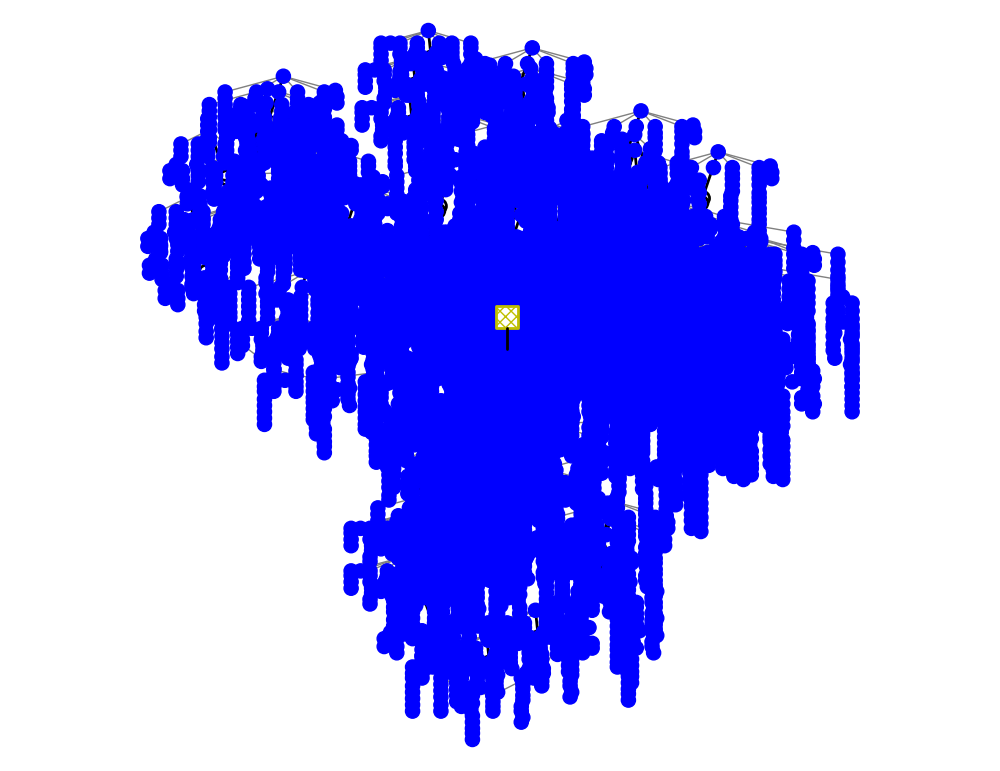

In [16]:
plot.simple_plot(net)
plt.show()

##### **4.x Cálculos Teóricos**

#### **5. Resultados e Conclusão**

#### **6. Referências Bibliográficas**

<a name="cite_note-1"></a>[1] SHORT, T.A. *Electric Power Distribution Handbook*. CRC Press, 2004. [^](#cite_ref-1)

#### **(Bônus)** 